# 1 Importation

## 1.1Importation des librairies

In [777]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, centroid
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from sklearn.neighbors import NearestCentroid
from sklearn.preprocessing import StandardScaler
# On charge Seaborn
sns.set()

## 1.2 Importation du DATAFRAME

In [778]:
clean_df = pd.read_csv('cleandf.csv')

# 2 Normalisation des données

## 2.1 Analyse de chaque colonne du dataframe 

In [779]:
## On utilise l'option .describe() pour connaitre les plages des differentes colonnes et savoir celle qui ont une plage trop grande afin de determiner lequel normaliser
clean_df.describe()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Importations - Quantité,Nourriture,Production,Variation de stock,Population,PIB
count,169.000000,169.000000,169.000000,169.000000,1.690000e+02,169.000000,169.000000,1.690000e+02,169.000000,1.690000e+02,169.000000
mean,5757.569586,681.647988,177.772722,163.216272,5.168666e+04,6940.684734,22508.738817,5.412283e+04,751.219053,3.503349e+07,19759.607692
std,883.668590,182.793133,72.011757,41.275419,1.481529e+05,12003.065347,63443.777985,1.599786e+05,1810.186483,1.117724e+08,20467.004631
min,3480.400000,337.970000,29.940000,61.960000,8.641000e+01,25.810000,24.080000,1.852000e+01,-1926.000000,5.204500e+04,750.800000
25%,5146.330000,539.710000,121.480000,131.110000,3.051980e+03,769.140000,1918.490000,2.262250e+03,1.000000,2.845414e+06,4614.000000
50%,5722.270000,668.870000,166.530000,161.610000,1.218243e+04,2429.990000,5803.720000,1.079365e+04,130.000000,9.429013e+06,13400.000000
75%,6509.500000,832.760000,233.690000,194.120000,3.237189e+04,6984.360000,18852.830000,3.172818e+04,663.000000,3.110465e+07,28604.900000
max,7669.740000,1168.310000,336.620000,289.600000,1.227763e+06,82992.780000,702474.780000,1.235768e+06,11055.000000,1.338677e+09,122978.000000


## 2.2 Normalisation des données

In [780]:
## Maintenant que nous savont quel colonne normaliser nous les normalisons en utilisant StandardScaler
# Liste des colonnes à normaliser
columns_to_normalize = [
    "Disponibilité intérieure",
    "Importations - Quantité",
    "Nourriture",
    "Production",
    "Variation de stock",
    "Population"
]

# Normalisation des colonnes sélectionnées à l'aide de StandardScaler
scaler = StandardScaler()
clean_df[columns_to_normalize] = scaler.fit_transform(clean_df[columns_to_normalize])

# Appliquer le logarithme à la colonne 'PIB'
clean_df["PIB"] = np.log(clean_df["PIB"])

# 3 Clusterings

## 3.1 Classification ascendante hiérarchique

### 3.1.1 Dendrogramme

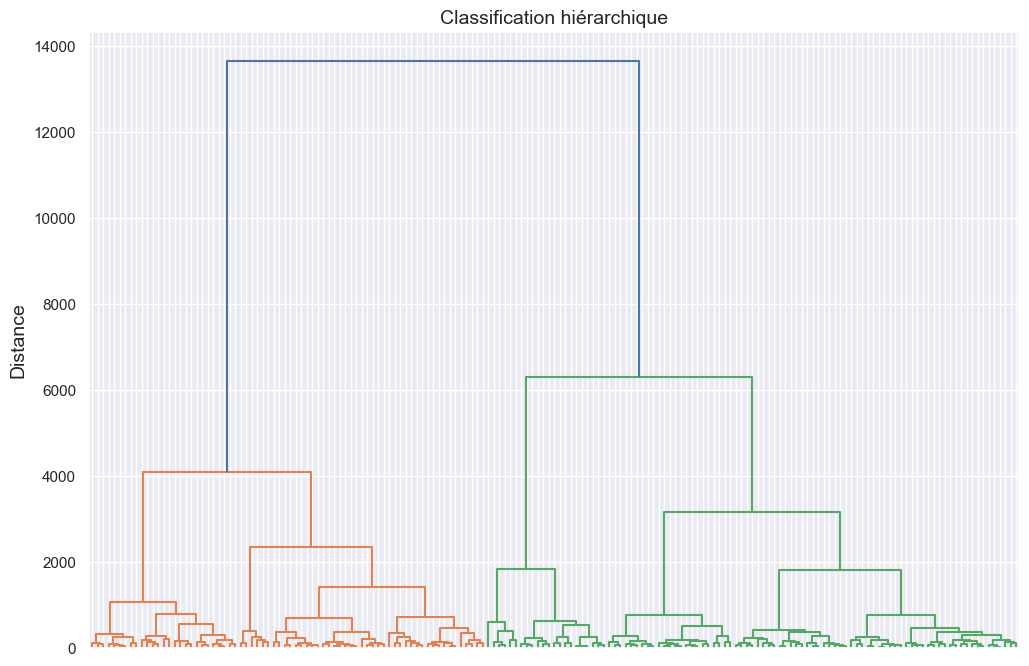

In [781]:
# Mettre la variable 'Zone' en tant qu'index
clean_df = clean_df.set_index('Zone')

# Calcul de la matrice de distance avec la méthode Ward
Z = linkage(clean_df, method = "ward")
pd.DataFrame(Z).head()

# On affiche notre dendrogramme.
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
_ = dendrogram(Z, ax=ax)
plt.title("Classification hiérarchique", fontsize = 14)
plt.ylabel("Distance", fontsize = 14)
plt.tick_params(axis ='x', labelbottom = False)
plt.show()

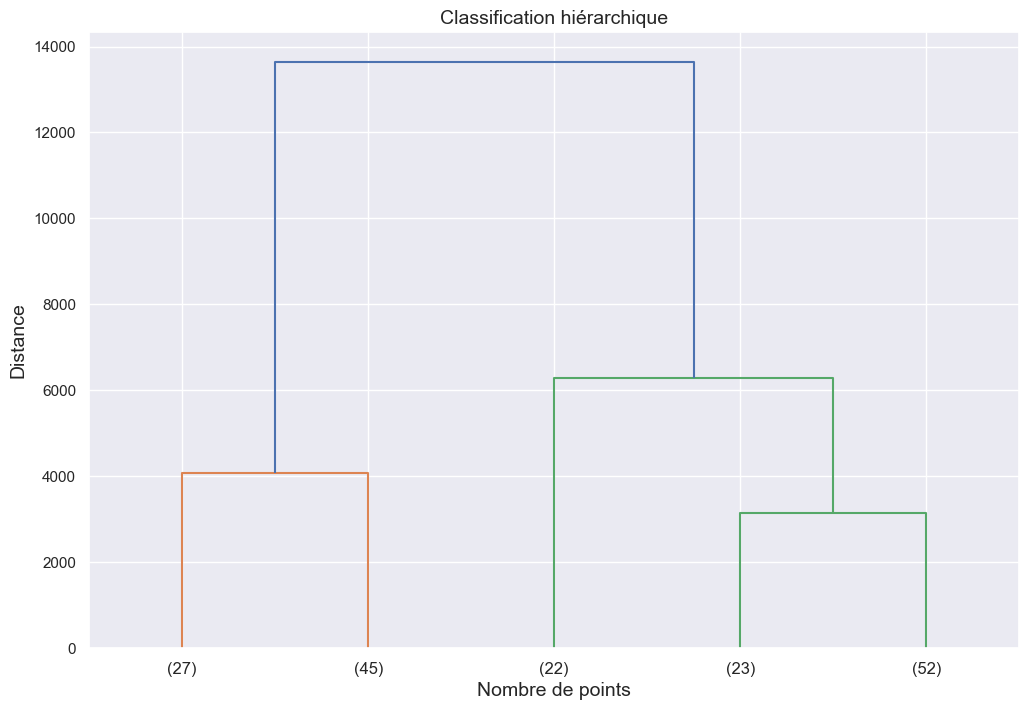

In [782]:
# Sur l'axe y, la distance entre clusters s'agrandit fortement à partir d'une distance de 20 000. Nous choisissons de grouper nos individus en 5 clusters. 
# les arguments p=5, truncate_mode="lastp" vont afficher 5 clusters

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
_ = dendrogram(Z, p=5, truncate_mode="lastp", ax=ax)
plt.title("Classification hiérarchique", fontsize = 14)
plt.xlabel("Nombre de points", fontsize = 14)
plt.ylabel("Distance", fontsize = 14)
plt.show()

### 3.1.2 Définition des clusters avec scikit-learn

In [783]:
# 3.1.2 Définition des clusters avec scikit-learn
# On instancie un estimateur
cah = AgglomerativeClustering(n_clusters=5, linkage="ward")

# On entraîne l'estimateur
cah.fit(clean_df)

# On affiche les clusters
cah_labels = cah.labels_

# On remplace les nombres par des lettres pour nommer les clusters
dd = {i:j for i,j in enumerate(list("abcde"))}
labels = [dd[i] for i in cah_labels]

# On ajoute les labels au dataframe
clean_df_hierarchical = clean_df.copy()
clean_df_hierarchical["cah_cluster"] = labels
clean_df_hierarchical.head()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Importations - Quantité,Nourriture,Production,Variation de stock,Population,PIB,cah_cluster
Zone,,,,,,,,,,,,
Afghanistan,4605.78,393.23,80.06,119.02,-0.233638,-0.069245,-0.130182,-0.264750,-0.301536,0.011330,7.647834,c
Afrique du Sud,5804.14,531.35,177.18,159.38,0.065920,0.138555,0.123014,0.087942,1.847711,0.197201,9.543271,b
Albanie,6652.45,1168.31,237.66,229.43,-0.316954,-0.515085,-0.302578,-0.312763,-0.430635,-0.288487,9.454932,a
Algérie,6766.34,747.90,194.25,177.25,-0.053231,0.932648,0.133504,-0.168484,0.014284,0.057032,9.376660,a
Allemagne,7083.84,841.88,292.42,208.09,0.836430,4.769879,0.744305,0.707262,1.650462,0.427355,10.879395,a


### 3.1.3 Calcul des centroïdes

In [784]:


# On stocke les centroïdes dans une variable
z_predict_clean = cah.fit_predict(clean_df)
clf = NearestCentroid()
clf.fit(clean_df, z_predict_clean)
centroids_clean = clf.centroids_
centroids_clean


array([[ 6.86177711e+03,  8.72871111e+02,  2.63140667e+02,
         2.13516889e+02,  2.52669666e-01,  6.37684523e-01,
         1.44986757e-01,  2.71457707e-01,  4.08083519e-01,
         1.76502511e-02,  1.04486406e+01],
       [ 5.54086077e+03,  6.26895769e+02,  1.53250000e+02,
         1.49886923e+02, -1.54267189e-01, -2.10388680e-01,
        -1.43064342e-01, -1.55903229e-01, -1.34395782e-01,
        -1.17603153e-01,  9.13992499e+00],
       [ 4.30321773e+03,  4.76518182e+02,  9.38377273e+01,
         1.09077727e+02, -2.71317789e-01, -4.58835626e-01,
        -2.22453553e-01, -2.72580780e-01, -3.49845425e-01,
        -1.59370114e-01,  7.72886300e+00],
       [ 6.17086148e+03,  7.71108148e+02,  1.95915926e+02,
         1.75618148e+02, -7.14361561e-02, -1.17343657e-01,
        -8.94775965e-02, -6.99015744e-02, -2.56487955e-01,
        -9.47749748e-02,  9.78696547e+00],
       [ 4.99306435e+03,  5.22496087e+02,  1.25178261e+02,
         1.32163913e+02,  1.97805496e-01, -1.95344769e-01,
  

## 3.2 K-means

### 3.2.1 Définition du nombre de clusters : méthode du coude

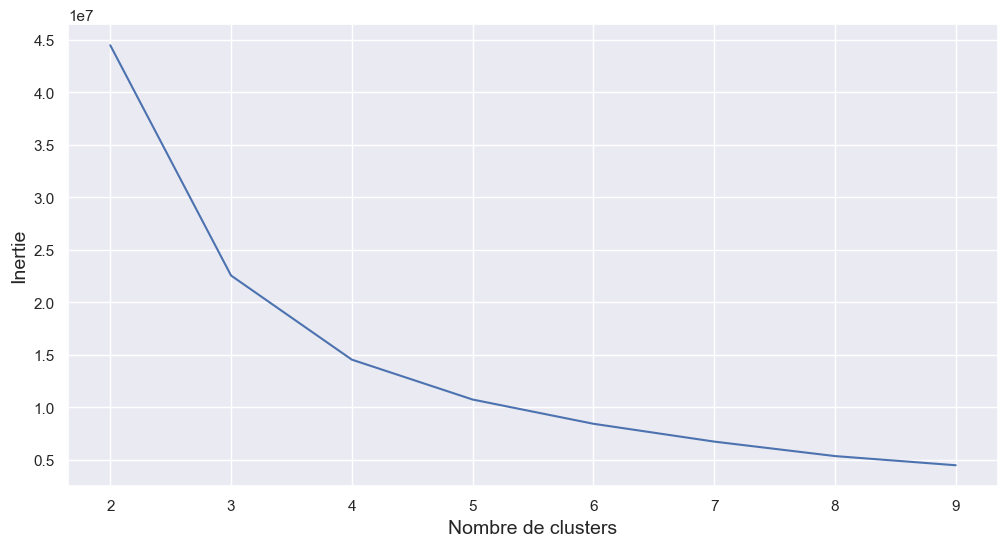

In [785]:
# On stocke nos inerties
intertia_clean = []

# On définit la liste du nombre de clusters que l'on veut tester
k_list = range(2, 10)

# Ignorer les avertissements liés à joblib et à la version future de scikit-learn
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    # Pour chaque valeur de k, on entraîne un k-means spécifique et on stocke son inertie
    for i in k_list:
        kmeans = KMeans(n_clusters=i, n_init=10)  # Définir explicitement n_init pour éviter l'avertissement
        kmeans.fit(clean_df)
        intertia_clean.append(kmeans.inertia_)

# La liste d'inerties
intertia_clean

# Graphique inertie intraclasse
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.set_ylabel("Inertie", fontsize = 14)
ax.set_xlabel("Nombre de clusters", fontsize = 14)
ax = plt.plot(k_list, intertia_clean)





### 3.2.2 Clusters

In [786]:
# On entraîne l'estimateur
kmeans = KMeans(n_clusters=5, n_init=10)  # Définir explicitement n_init pour éviter l'avertissement
kmeans.fit(clean_df)

kmeans_labels = kmeans.labels_

# On remplace les chiffres par des lettres
dd = {i:j for i,j in enumerate(list("abcde"))}
labels_clean = [dd[i] for i in kmeans_labels]

# On ajoute nos labels à clean_df_kmeans
clean_df_kmeans = clean_df.copy()
clean_df_kmeans["kmeans_cluster"] = labels_clean
clean_df_kmeans.head()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Importations - Quantité,Nourriture,Production,Variation de stock,Population,PIB,kmeans_cluster
Zone,,,,,,,,,,,,
Afghanistan,4605.78,393.23,80.06,119.02,-0.233638,-0.069245,-0.130182,-0.264750,-0.301536,0.011330,7.647834,b
Afrique du Sud,5804.14,531.35,177.18,159.38,0.065920,0.138555,0.123014,0.087942,1.847711,0.197201,9.543271,d
Albanie,6652.45,1168.31,237.66,229.43,-0.316954,-0.515085,-0.302578,-0.312763,-0.430635,-0.288487,9.454932,e
Algérie,6766.34,747.90,194.25,177.25,-0.053231,0.932648,0.133504,-0.168484,0.014284,0.057032,9.376660,e
Allemagne,7083.84,841.88,292.42,208.09,0.836430,4.769879,0.744305,0.707262,1.650462,0.427355,10.879395,e


### 3.2.3 Calcul des centroïdes

In [787]:
# On stocke les centroïdes dans une variable
centroids_clean = kmeans.cluster_centers_
centroids_clean

array([[ 6.30246838e+03,  7.97388108e+02,  2.18574595e+02,
         1.84952162e+02,  2.94319325e-02, -2.95459763e-02,
        -9.75930807e-02,  5.13894835e-02, -7.51692353e-02,
        -1.23416757e-01,  9.97360747e+00],
       [ 4.30321773e+03,  4.76518182e+02,  9.38377273e+01,
         1.09077727e+02, -2.71317789e-01, -4.58835626e-01,
        -2.22453553e-01, -2.72580780e-01, -3.49845425e-01,
        -1.59370114e-01,  7.72886300e+00],
       [ 5.09136343e+03,  5.44190857e+02,  1.30659429e+02,
         1.36242286e+02,  9.27892137e-02, -2.39373900e-01,
         2.10544669e-01,  6.56870792e-02, -1.01738295e-03,
         3.10727383e-01,  8.71725117e+00],
       [ 5.63594833e+03,  6.35393810e+02,  1.56628810e+02,
         1.51825000e+02, -9.67915102e-02, -1.43313428e-01,
        -1.14508238e-01, -9.80869246e-02, -1.16557406e-01,
        -9.15753392e-02,  9.22087264e+00],
       [ 6.97756333e+03,  8.93288788e+02,  2.64860909e+02,
         2.18044848e+02,  1.72655479e-01,  7.75298042e-01,
  

# 4 Comparaison classification hiérarchique VS K-means

## 4.1 Liste des pays des clusters

### 4.1.1 On compare la correspondance des clusters de chaque méthode.

In [788]:
# On réindexe les 3 dataframes
clean_df = clean_df.reset_index()
clean_df_hierarchical = clean_df_hierarchical.reset_index()
clean_df_kmeans = clean_df_kmeans.reset_index()

In [789]:
# On ajoute les colonnes 'cah_cluster' et 'kmeans_cluster' au dataframe 'clean_df'
clean_df = clean_df.merge(clean_df_hierarchical[['Zone', 'cah_cluster']])
clean_df = clean_df.merge(clean_df_kmeans[['Zone', 'kmeans_cluster']])

In [790]:
# On modifie les labels de 'kmeans_cluster' afin qu'ils correspondent à ceux de 'cah_cluster'.
# (Les commandes suivantes sont pour vérifier les correspondances; elles peuvent être commentées ou supprimées si non nécessaires)
clean_df.loc[clean_df['kmeans_cluster'] == 'a', ('Zone', 'cah_cluster', 'kmeans_cluster')].head()
clean_df.loc[clean_df['kmeans_cluster'] == 'b', ('Zone', 'cah_cluster', 'kmeans_cluster')].head()
clean_df.loc[clean_df['kmeans_cluster'] == 'c', ('Zone', 'cah_cluster', 'kmeans_cluster')].head()
clean_df.loc[clean_df['kmeans_cluster'] == 'd', ('Zone', 'cah_cluster', 'kmeans_cluster')].head()
clean_df.loc[clean_df['kmeans_cluster'] == 'e', ('Zone', 'cah_cluster', 'kmeans_cluster')].head()

,Zone,cah_cluster,kmeans_cluster
2,Albanie,a,e
3,Algérie,a,e
4,Allemagne,a,e
10,Australie,a,e
11,Autriche,a,e


In [791]:
# On remplace les labels des kmeans_clusters
clean_df['kmeans_cluster'].replace((['a', 'b', 'c', 'e']), ['e', 'c', 'a', 'b'], inplace=True)

clean_df[['Zone', 'cah_cluster', 'kmeans_cluster']].head(10)


,Zone,cah_cluster,kmeans_cluster
0,Afghanistan,c,c
1,Afrique du Sud,b,d
2,Albanie,a,b
3,Algérie,a,b
4,Allemagne,a,b
5,Angola,e,a
6,Antigua-et-Barbuda,e,a
7,Arabie saoudite,a,e
8,Argentine,a,e
9,Arménie,d,e


### 4.1.2 On calcule le taux de correspondance des 2 méthodes de clustering.

In [792]:
# On affiche le nombre total de pays
print(len(clean_df.index))

169


In [793]:
# On affiche le nombre de pays qui font partis des mêmes clusters des 2 méthodes de clustering
print(len(clean_df.query('cah_cluster == kmeans_cluster')))

24


In [794]:
# On affiche le taux de correspondance
print(len(clean_df.query('cah_cluster == kmeans_cluster')) / len(clean_df.index) * 100)

14.201183431952662


In [795]:
#### Les clusters des 2 méthodes sont très similaires.

clean_df.loc[clean_df['kmeans_cluster'] == 'a', :]

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Importations - Quantité,Nourriture,Production,Variation de stock,Population,PIB,cah_cluster,kmeans_cluster
5,Angola,4882.02,625.39,121.48,107.19,-0.165918,-0.227019,-0.061069,-0.190411,-0.044447,-0.046811,8.884070,e,a
6,Antigua-et-Barbuda,4892.41,610.83,184.26,160.92,-0.349326,-0.574002,-0.354979,-0.339192,-0.412904,-0.313511,9.941645,e,a
13,Bahamas,5288.10,637.78,197.96,163.27,-0.347478,-0.562671,-0.351987,-0.338181,-0.403646,-0.310942,10.444570,b,a
14,Bangladesh,5075.61,479.63,67.45,118.89,0.410684,1.088879,0.854947,0.264573,1.531331,1.118545,8.482767,e,a
20,Bolivie (État plurinational de),4884.48,632.25,129.86,148.74,-0.204333,-0.482841,-0.243977,-0.206071,-0.317604,-0.213930,9.017350,e,a
22,Botswana,5124.21,540.75,131.91,140.65,-0.340687,-0.503863,-0.337034,-0.334992,-0.310955,-0.294581,9.592660,e,a
27,Cabo Verde,5059.73,523.00,131.17,141.28,-0.347345,-0.558626,-0.351410,-0.338361,-0.407918,-0.309544,8.751522,e,a
28,Cambodge,5278.32,574.29,76.15,131.11,-0.196997,-0.438516,-0.210529,-0.183774,0.059164,-0.170710,8.287201,b,a
45,El Salvador,5323.83,574.98,129.33,151.21,-0.264654,-0.354873,-0.297765,-0.271962,-0.626776,-0.257045,9.061597,b,a
47,Équateur,5120.47,577.16,194.57,125.58,-0.184517,-0.402038,-0.202680,-0.145230,-0.622897,-0.163747,9.365582,e,a


## 4.2 Variance

### 4.2.1.1 Disponibilité alimentaire classification hiérarchique

Text(0, 0.5, 'Cluster')

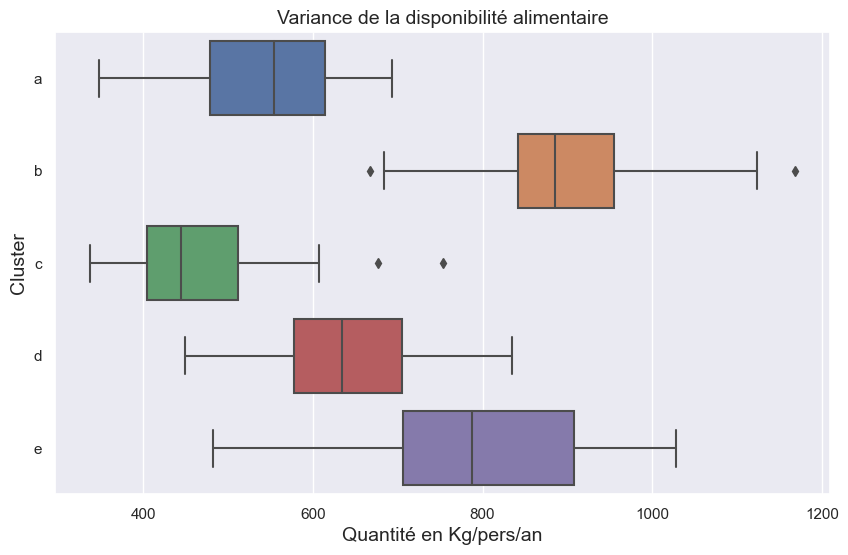

In [796]:
# On trie par ordre alphabétique des clusters
cah_cluster_sorted = sorted(clean_df.cah_cluster.unique())

plt.figure(figsize=(10,6))
# Note: Vous devez remplacer "Disponibilité alimentaire en quantité (kg/personne/an)" par la colonne correspondante dans clean_df
sns.boxplot(x="Disponibilité alimentaire en quantité (kg/personne/an)", 
            y="kmeans_cluster",
            order=cah_cluster_sorted,
            data=clean_df)
plt.title("Variance de la disponibilité alimentaire", fontsize=14)
plt.xlabel('Quantité en Kg/pers/an', fontsize=14)
plt.ylabel('Cluster', fontsize=14)


### 4.2.1.2 Disponibilité alimentaire K-means

Text(0, 0.5, 'Cluster')

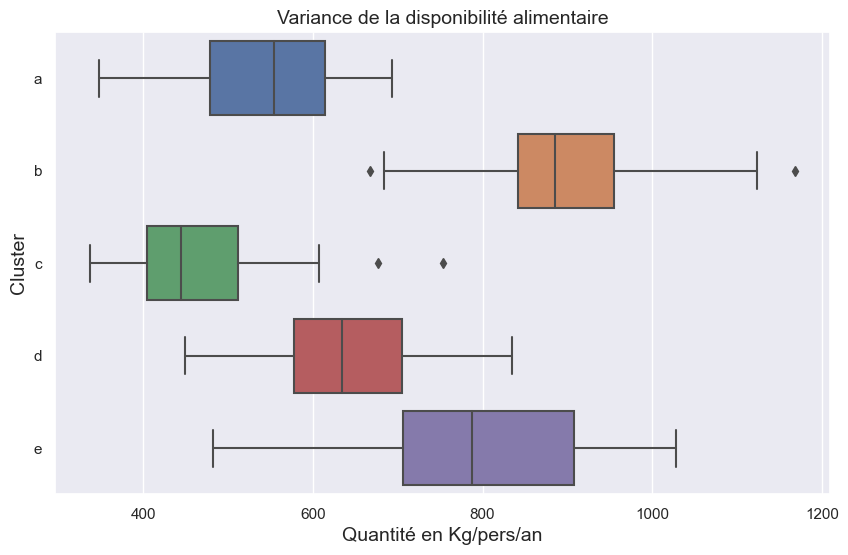

In [797]:
# On trie par ordre alphabétique des clusters
cah_cluster_sorted = sorted(clean_df.cah_cluster.unique())

plt.figure(figsize=(10,6))
# Note: Vous devez remplacer "Disponibilité alimentaire en quantité (kg/personne/an)" par la colonne correspondante dans clean_df
sns.boxplot(x="Disponibilité alimentaire en quantité (kg/personne/an)", 
            y="kmeans_cluster",
            order=cah_cluster_sorted,
            data=clean_df)
plt.title("Variance de la disponibilité alimentaire", fontsize=14)
plt.xlabel('Quantité en Kg/pers/an', fontsize=14)
plt.ylabel('Cluster', fontsize=14)

In [798]:
# Trier par ordre alphabétique des clusters pour K-means
kmeans_cluster_sorted = sorted(clean_df.kmeans_cluster.unique())

In [799]:
### 4.2.2 Population K-means

Text(0, 0.5, 'kmeans_cluster')

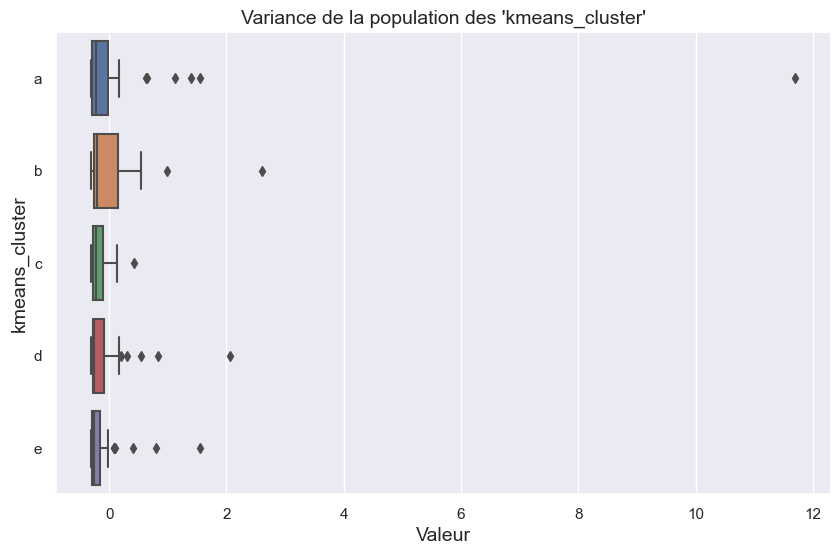

In [800]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Population", 
            y="kmeans_cluster",
            order=kmeans_cluster_sorted,
            data=clean_df)
plt.title("Variance de la population des 'kmeans_cluster'", fontsize=14)
plt.xlabel('Valeur', fontsize=14)
plt.ylabel('kmeans_cluster', fontsize=14)

### 4.2.3 PIB par habitant classification hiérarchique

Text(0, 0.5, 'cah_cluster')

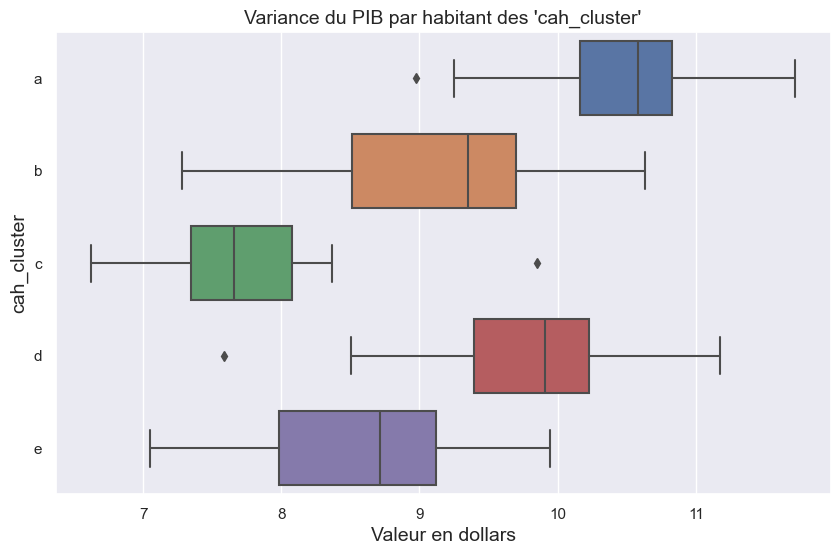

In [801]:
plt.figure(figsize=(10,6))
# Note: Vous devez remplacer "PIB/hab en $" par la colonne correspondante pour le PIB par habitant dans clean_df
sns.boxplot(x="PIB", 
            y="cah_cluster",
            order=cah_cluster_sorted,
            data=clean_df)
plt.title("Variance du PIB par habitant des 'cah_cluster'", fontsize=14)
plt.xlabel('Valeur en dollars', fontsize=14)
plt.ylabel('cah_cluster', fontsize=14)

### 4.2.4 PIB par habitant K-means

Text(0, 0.5, 'kmeans_cluster')

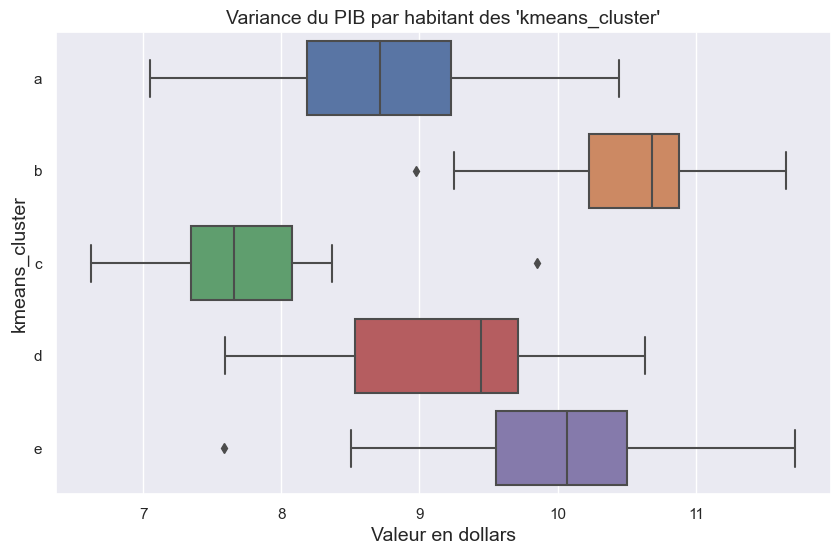

In [802]:
plt.figure(figsize=(10,6))
# Note: Vous devez remplacer "PIB/hab en $" par la colonne correspondante pour le PIB par habitant dans clean_df
sns.boxplot(x="PIB", 
            y="kmeans_cluster",
            order=kmeans_cluster_sorted,
            data=clean_df)
plt.title("Variance du PIB par habitant des 'kmeans_cluster'", fontsize=14)
plt.xlabel('Valeur en dollars', fontsize=14)
plt.ylabel('kmeans_cluster', fontsize=14)


## 5 Analyse des centroïdes

In [803]:
centroids_clean

array([[ 6.30246838e+03,  7.97388108e+02,  2.18574595e+02,
         1.84952162e+02,  2.94319325e-02, -2.95459763e-02,
        -9.75930807e-02,  5.13894835e-02, -7.51692353e-02,
        -1.23416757e-01,  9.97360747e+00],
       [ 4.30321773e+03,  4.76518182e+02,  9.38377273e+01,
         1.09077727e+02, -2.71317789e-01, -4.58835626e-01,
        -2.22453553e-01, -2.72580780e-01, -3.49845425e-01,
        -1.59370114e-01,  7.72886300e+00],
       [ 5.09136343e+03,  5.44190857e+02,  1.30659429e+02,
         1.36242286e+02,  9.27892137e-02, -2.39373900e-01,
         2.10544669e-01,  6.56870792e-02, -1.01738295e-03,
         3.10727383e-01,  8.71725117e+00],
       [ 5.63594833e+03,  6.35393810e+02,  1.56628810e+02,
         1.51825000e+02, -9.67915102e-02, -1.43313428e-01,
        -1.14508238e-01, -9.80869246e-02, -1.16557406e-01,
        -9.15753392e-02,  9.22087264e+00],
       [ 6.97756333e+03,  8.93288788e+02,  2.64860909e+02,
         2.18044848e+02,  1.72655479e-01,  7.75298042e-01,
  

In [804]:
# On utilise les centroïdes que nous avons calculés précédemment pour K-means
centroids_df_clean = pd.DataFrame(centroids_clean, columns = clean_df.columns.drop(["Zone", "cah_cluster", "kmeans_cluster"]))

In [805]:
# On instancie notre scaler

std_scale = preprocessing.StandardScaler()

In [806]:
# On l'entraîne
std_scale.fit(centroids_df_clean)

StandardScaler()

In [807]:
# On transforme nos centroïdes
centroids_scaled_clean = std_scale.transform(centroids_df_clean)

In [808]:
# On vérifie le centrage et la réduction
print(pd.DataFrame(centroids_scaled_clean).describe().round(2).iloc[1:3:, :])

        0     1     2     3     4     5     6     7     8     9     10
mean  0.00  0.00 -0.00  0.00 -0.00  0.00  0.00 -0.00  0.00  0.00  0.00
std   1.12  1.12  1.12  1.12  1.12  1.12  1.12  1.12  1.12  1.12  1.12


In [809]:
centroids_scaled_clean

array([[ 0.68943233,  0.82457614,  0.74382307,  0.65606338,  0.2831187 ,
        -0.02465179, -0.51536034,  0.42429894, -0.22421375, -0.68391618,
         0.77746208],
       [-1.4630387 , -1.24194908, -1.28809732, -1.34116509, -1.6486152 ,
        -1.04302762, -1.23981724, -1.6504676 , -1.24999187, -0.89405659,
        -1.55292982],
       [-0.61449038, -0.80611113, -0.68828455, -0.62611753,  0.6900664 ,
        -0.52241289,  1.27249548,  0.51586343,  0.05270631,  1.8535723 ,
        -0.52683005],
       [-0.02816908, -0.21872919, -0.26525232, -0.21593668, -0.52762221,
        -0.29453489, -0.61350431, -0.53297611, -0.37877786, -0.49780925,
        -0.00399308],
       [ 1.41626583,  1.44221325,  1.49781111,  1.52715593,  1.20305232,
         1.88462719,  1.0961864 ,  1.24328134,  1.80027717,  0.22220972,
         1.30629087]])

In [810]:
# On convertit 'centroids_scaled_clean' en dataframe
centroids_scaled_df_clean = pd.DataFrame(centroids_scaled_clean, columns = clean_df.columns.drop(["Zone", "cah_cluster", "kmeans_cluster"]))

In [811]:
centroids_scaled_df_clean

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Importations - Quantité,Nourriture,Production,Variation de stock,Population,PIB
0,0.689432,0.824576,0.743823,0.656063,0.283119,-0.024652,-0.515360,0.424299,-0.224214,-0.683916,0.777462
1,-1.463039,-1.241949,-1.288097,-1.341165,-1.648615,-1.043028,-1.239817,-1.650468,-1.249992,-0.894057,-1.552930
2,-0.614490,-0.806111,-0.688285,-0.626118,0.690066,-0.522413,1.272495,0.515863,0.052706,1.853572,-0.526830
3,-0.028169,-0.218729,-0.265252,-0.215937,-0.527622,-0.294535,-0.613504,-0.532976,-0.378778,-0.497809,-0.003993
4,1.416266,1.442213,1.497811,1.527156,1.203052,1.884627,1.096186,1.243281,1.800277,0.222210,1.306291


<Axes: >

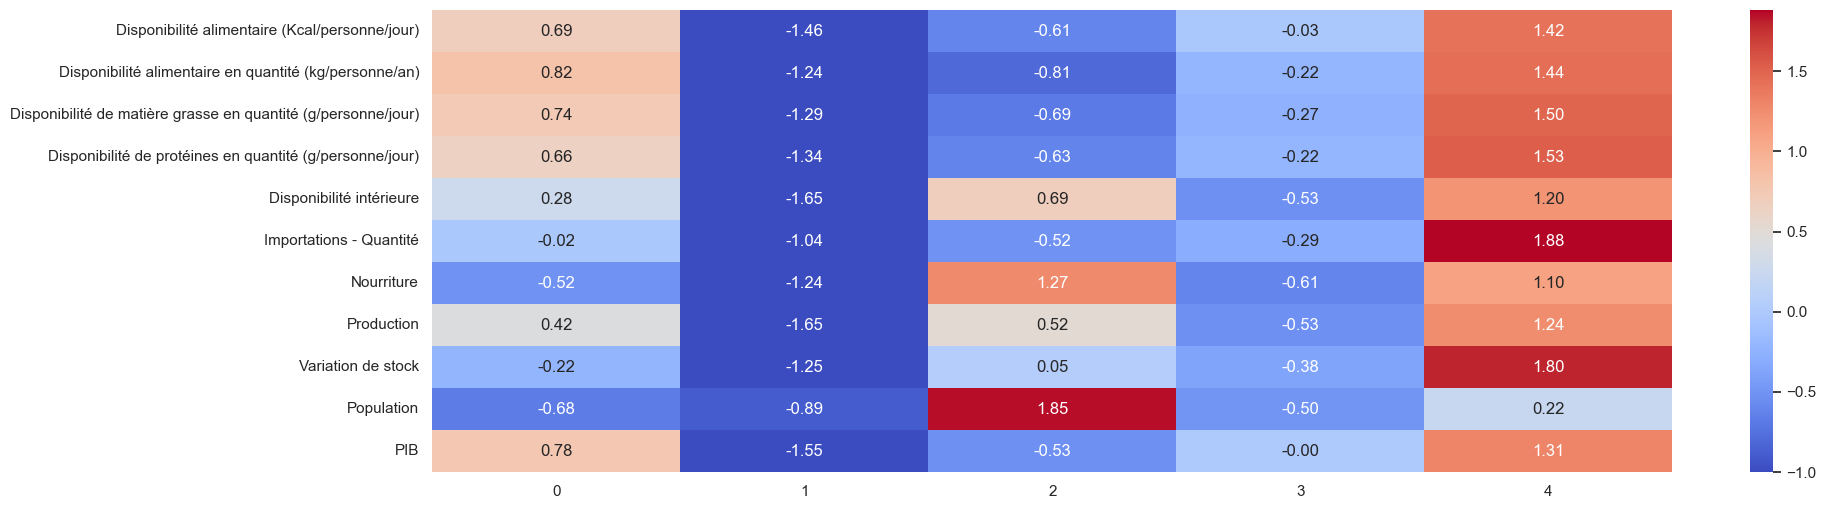

In [812]:
# On affiche la heatmap
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(centroids_scaled_df_clean.T, vmin=-1, annot=True, cmap="coolwarm", fmt="0.2f")


## 6 Analyse des composantes principales

In [813]:
# On supprime les colonnes 'cah_cluster' et 'kmeans_cluster'
pca_df = clean_df.drop(['cah_cluster', 'kmeans_cluster'], axis=1)

# On met la variable 'Zone' en tant qu'index
pca_df = pca_df.set_index('Zone')

### 5.1 Préparation des données

In [814]:
X = pca_df.values

# On enregistre les pays dans une variable 'zones' et nos colonnes dans 'features'.
zones = pca_df.index
features = pca_df.columns

### 5.2 Scaling

In [815]:
# Instanciation du scaler
scaler = StandardScaler()

# Fit et transformation
X_scaled = scaler.fit_transform(X)

### 5.3 ACP

In [816]:
n_components = 6
pca = PCA(n_components=n_components)
pca.fit(X_scaled)


PCA(n_components=6)

### 5.4 Variance captée et diagramme d'éboulis

In [817]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round()
x_list = range(1, n_components+1)

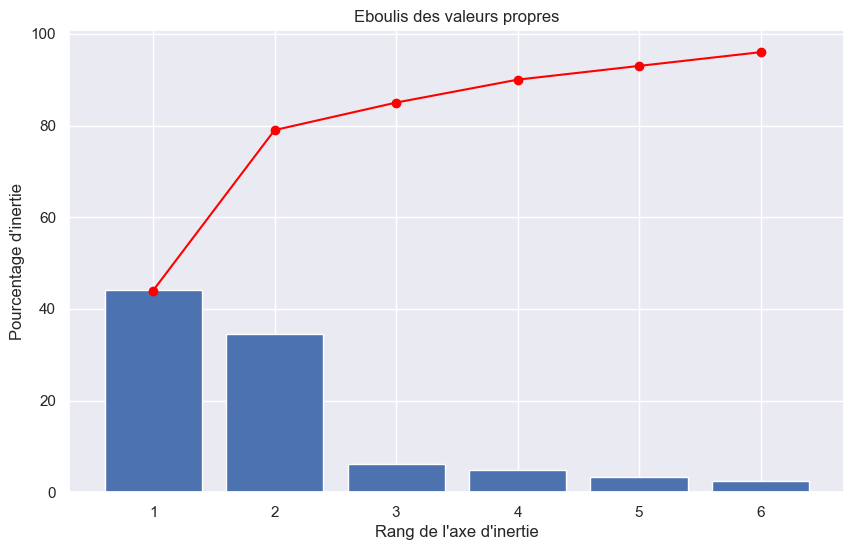

In [818]:
plt.figure(figsize = (10, 6))
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum, c="red", marker='o')
plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("Pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show()


### 5.5 Composantes

In [819]:
pcs = pca.components_
pcs_df = pd.DataFrame(pcs, columns=features, index=[f"F{i}" for i in x_list])

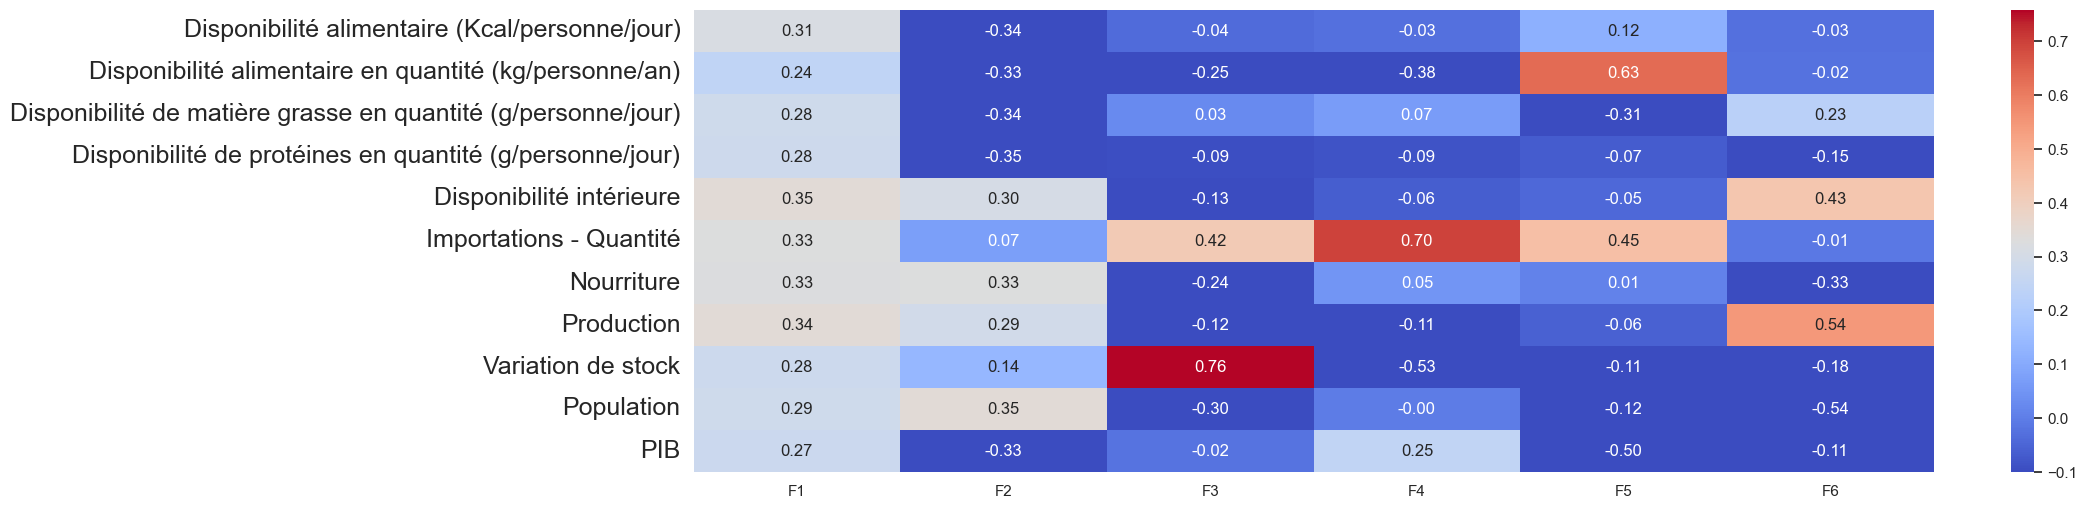

In [820]:
# Heatmap
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs_df.T, vmin=-0.1, annot=True, cmap="coolwarm", fmt="0.2f")
ax.tick_params(axis='y', which='major', labelsize=18)


## 5.6 Cercle des corrélations

In [821]:
def correlation_graph(pca, x_y, features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel(f'F{x+1} ({round(100*pca.explained_variance_ratio_[x],1)}%)')
    plt.ylabel(f'F{y+1} ({round(100*pca.explained_variance_ratio_[y],1)}%)')

    plt.title(f"Cercle des corrélations (F{x+1} et F{y+1})")
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
    plt.axis('equal')
    plt.show(block=False)

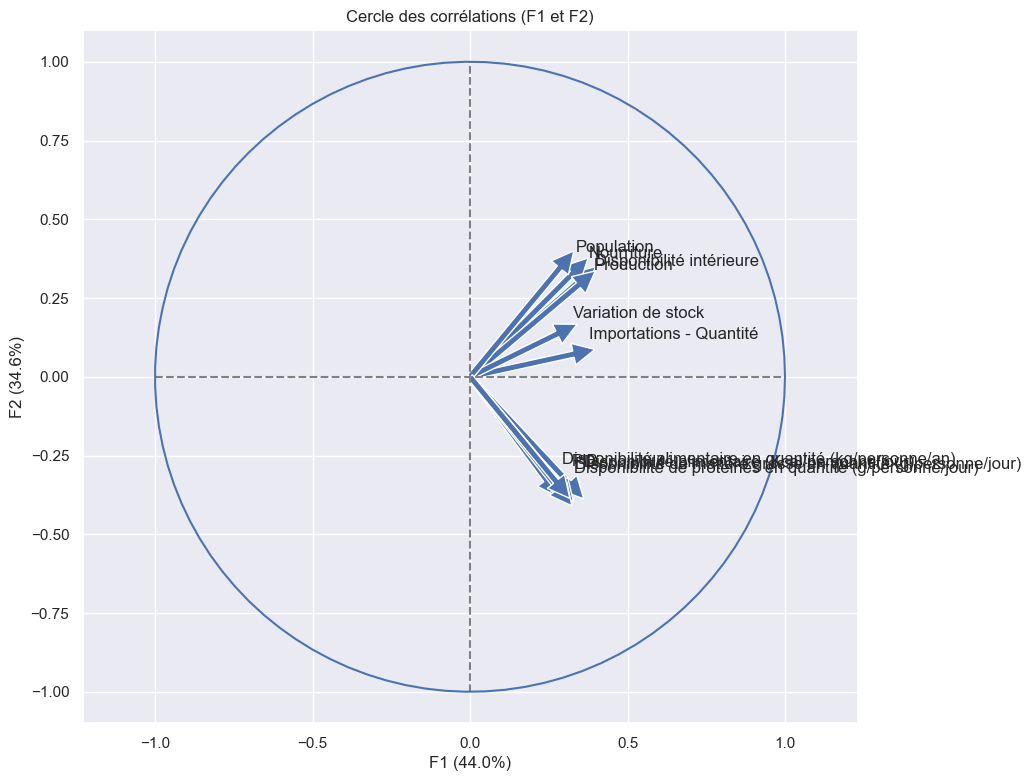

In [822]:
# On vérifie la fonction pour F1 et F2 en reprécisant 0 et 1
correlation_graph(pca, (0,1), features)

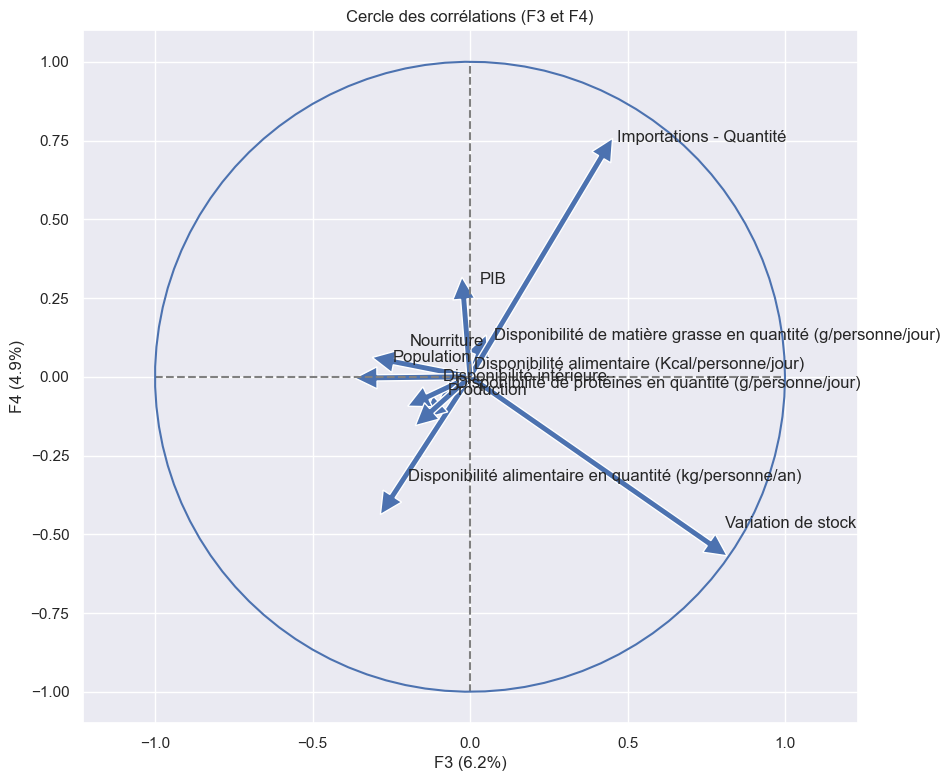

In [823]:
# On applique la fonction pour F3 et F4
correlation_graph(pca, (2,3), features)

### 5.7 Projection des points

In [824]:
# On calcule les coordonnées de nos points dans le nouvel espace.
X_proj = pca.transform(X_scaled)

In [825]:
# On remplace les labels par des nombres pour colorier les clusters 
labels_numerical = [0 if label == 'a' else 1 if label == 'b' else 2 if label == 'c' else 3 if label == 'd' else 4 for label in labels]

In [826]:
# On convertit 'X_proj' en dataframe
X_proj = pd.DataFrame(X_proj, columns = ["F1", "F2", "F3", "F4", "F5", "F6"])

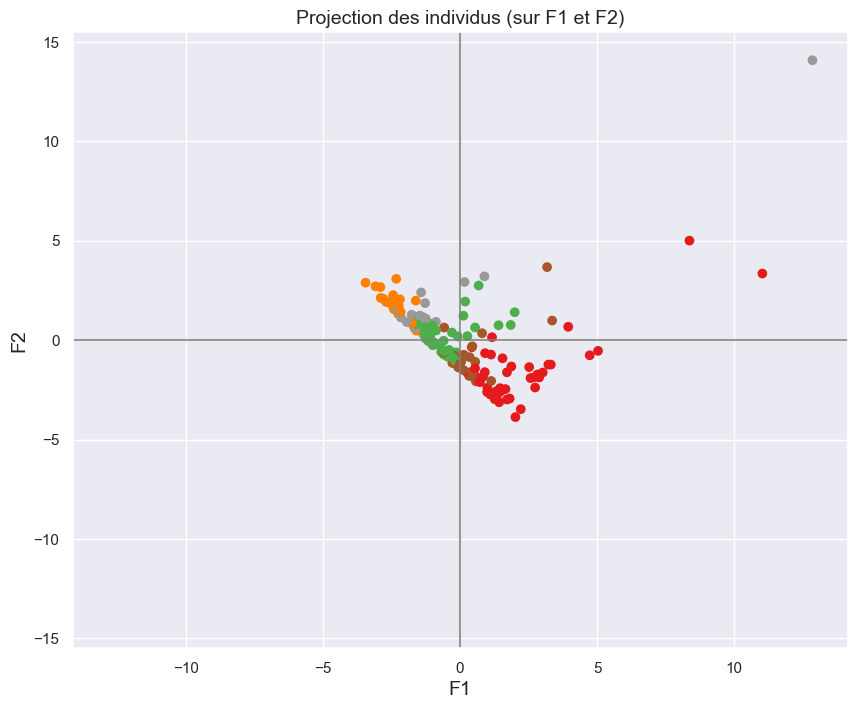

In [827]:
# On affiche la graphique
fig, ax = plt.subplots(1,1, figsize=(10, 8))
ax.scatter(X_proj.iloc[:, 0], X_proj.iloc[:, 1], c= labels_numerical, cmap="Set1")
# Valeur x max et y max
x_max = np.abs(X_proj.iloc[:, 0]).max() * 1.1
y_max = np.abs(X_proj.iloc[:, 1]).max() * 1.1
# On borne x et y 
ax.set_xlim(left=-x_max, right=x_max)
ax.set_ylim(bottom= -y_max, top=y_max)
# Affichage des lignes horizontales et verticales
plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)
# Titre et display
plt.title(f"Projection des individus (sur F1 et F2)", fontsize = 14)
plt.xlabel("F1", fontsize = 14)
plt.ylabel("F2", fontsize = 14)
plt.show()

In [ ]:
# Identifier le meilleur cluster en fonction du PIB et de la disponibilité alimentaire
cluster_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=features)
best_cluster = cluster_centroids[['PIB', 'Disponibilité alimentaire (Kcal/personne/jour)']].mean(axis=1).idxmax()

# Afficher l'étiquette du meilleur cluster
cluster_label_map = {0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e'}
print(f"Le meilleur cluster est : {cluster_label_map[best_cluster]}")

# Extraire et afficher les pays du meilleur cluster
countries_in_best_cluster = clean_df[clean_df['kmeans_cluster'] == cluster_label_map[best_cluster]]['Zone']
print(countries_in_best_cluster)


Le meilleur cluster est : e
7     Arabie saoudite
8           Argentine
9             Arménie
12        Azerbaïdjan
16            Bélarus
Name: Zone, dtype: object
